# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

<br> 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

<br>

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

<br>

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
 

In [124]:
#importing the required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading and Understanding the Data

In [125]:
df=pd.read_csv("train.csv")

In [126]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
df.shape

(1460, 81)

The given data has 1460 observations and 81 columns.

# 2. Data Cleaning

In [128]:
#checking for null values
print(round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64


In [129]:
#removing the columns with more than 15% null values
cols_to_drop=list(df.loc[:,list(df.isnull().sum()/len(df)*100>15)].columns)
df=df.drop(cols_to_drop,axis=1)
#checking for null values
print(round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False).head(20))

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCond      5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
RoofMatl        0.00
RoofStyle       0.00
SalePrice       0.00
Exterior1st     0.00
Exterior2nd     0.00
YearBuilt       0.00
ExterQual       0.00
dtype: float64


**Imputing the values in the columns with less than 6% missing values and performing the univariate analysis of these columns**
- For Categorical Variables: We replace the values with the mode, that is, the maximum occuring observation
- For Continuous Variables: We replace the values with the median of the observations.

In [130]:
#imputing the values in the columns with less than 6% missing values
ic=list(df.loc[:,list(df.isnull().sum()/len(df)*100>0)].columns)

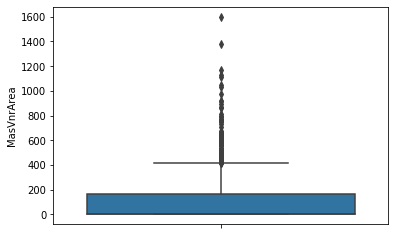

In [131]:
#checking MasVnrArea

sns.boxplot(y=df['MasVnrArea'])


0.0
0.0


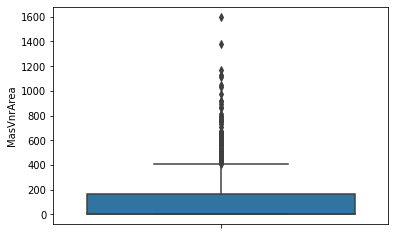

In [132]:

md=df['MasVnrArea'].median()
print(md)
df.loc[df['MasVnrArea'].isnull(),'MasVnrArea']=md
print(df['MasVnrArea'].median())
sns.boxplot(y=df['MasVnrArea'])

Thus, we observe that the distribution remains the same even after imputing.

In [133]:
#checking the categorical columns
ic.remove('MasVnrArea')

In [134]:
len(ic)

12

In [135]:
#replacing the NA values with the mode
for j in range(12):
    c=ic[j]
    mo=df[c].mode()[0]
    df.loc[df[c].isnull(),c]=mo

In [136]:
#checking the null values again
print(round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False))

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 75, dtype: float64


Hence, the data cleaning has been performed.

# 3. EDA

In [137]:
#setting the Id column as index
df=df.set_index('Id')

In [138]:
cont_col=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

In [139]:
len(cont_col)

19

In [140]:
#checking the continuous columns
df[cont_col].describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


## Univariate Analysis of Continuous Variables

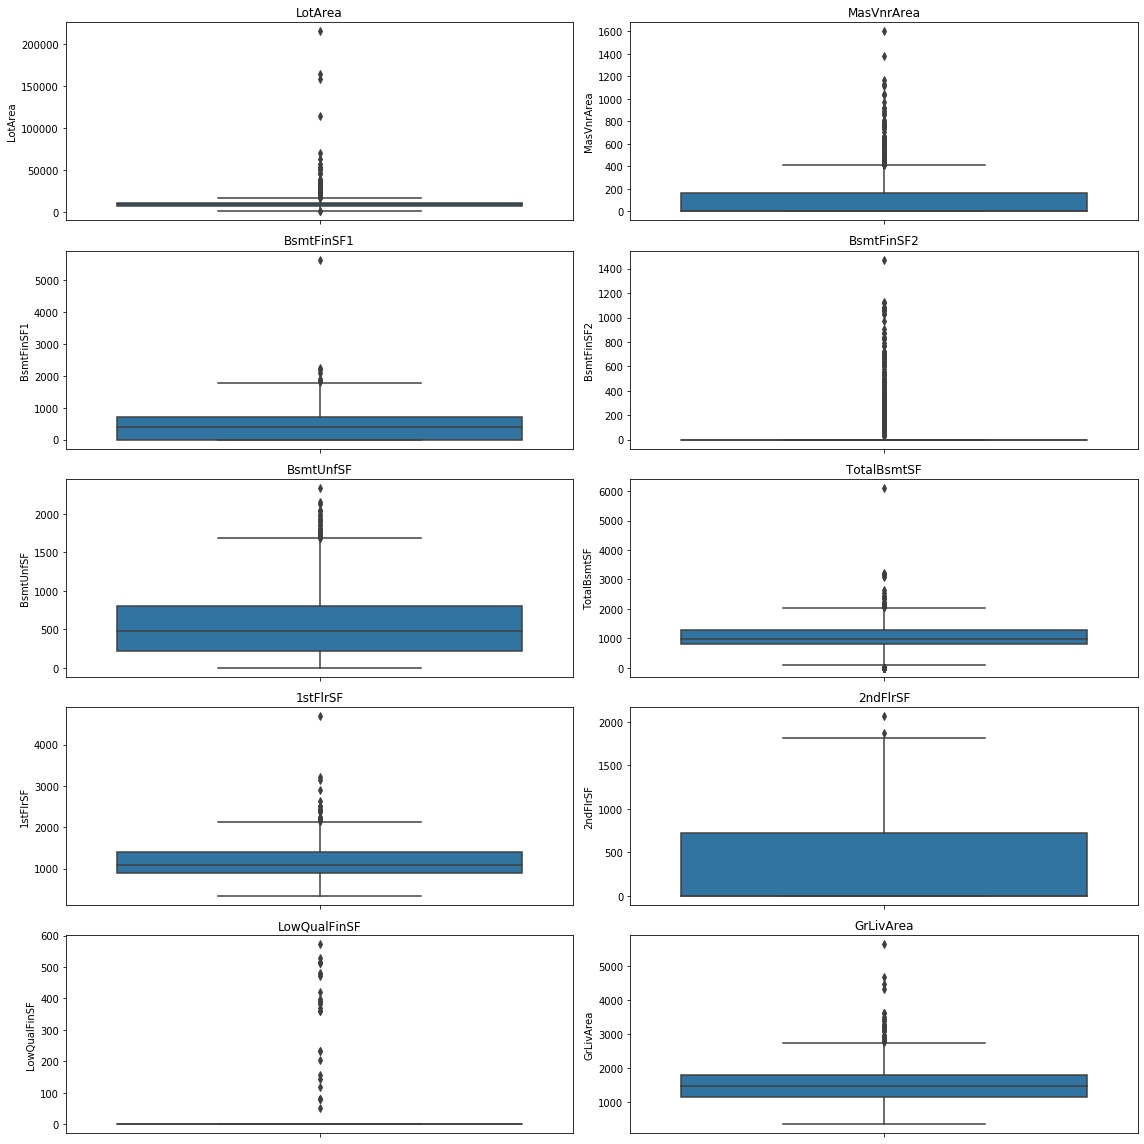

In [141]:
i=1
plt.figure(figsize=(16,16))
for j in range(10):
    plt.subplot(5,2,i)
    col=cont_col[j]
    sns.boxplot(y=df[col])
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()
    

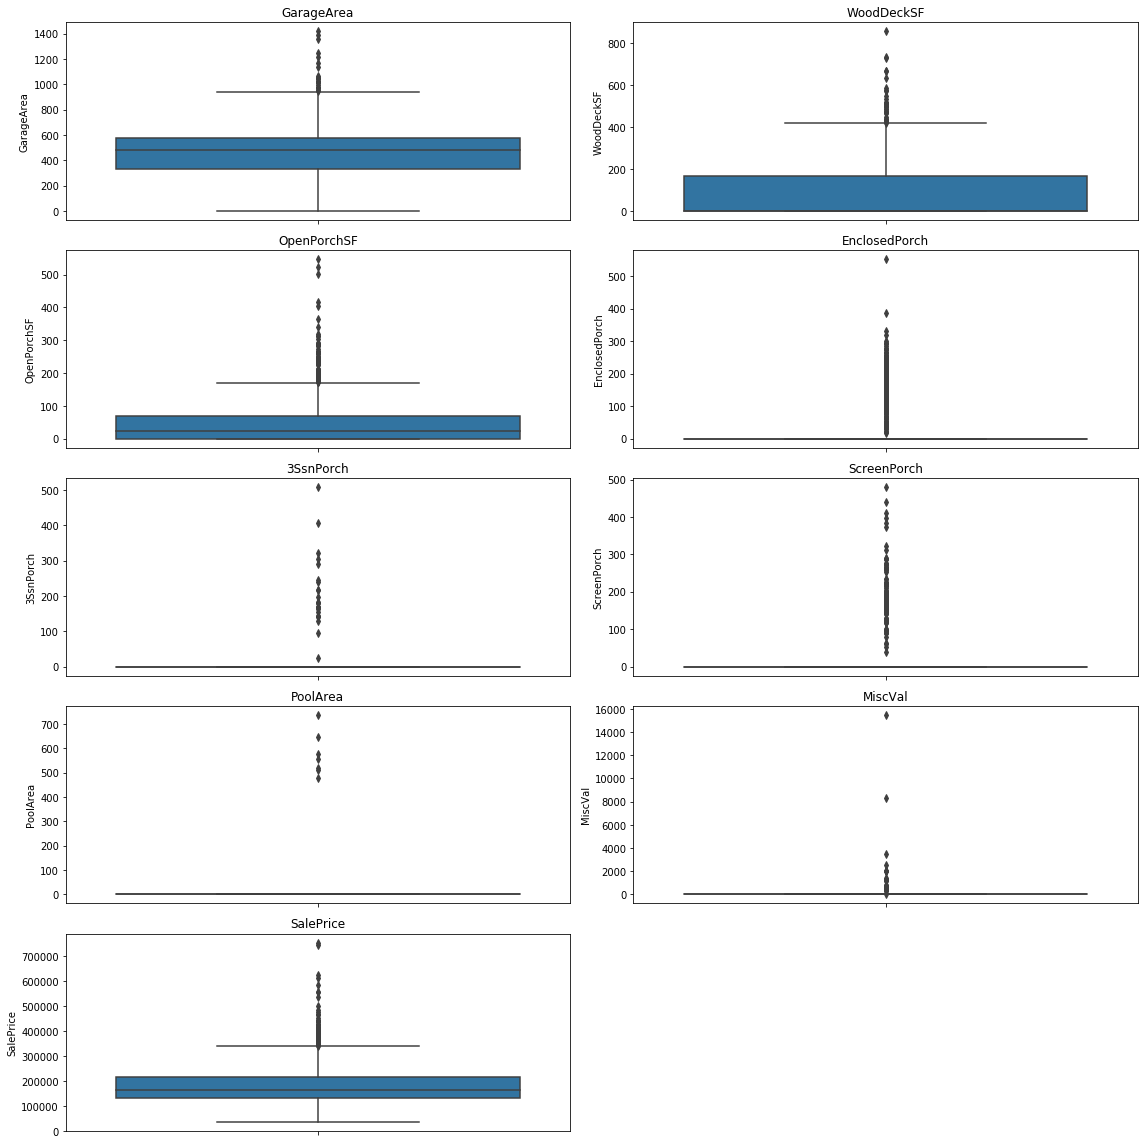

In [142]:
i=1
plt.figure(figsize=(16,16))
for j in range(10,19):
    plt.subplot(5,2,i)
    col=cont_col[j]
    sns.boxplot(y=df[col])
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()

We observe that there is a huge variation in the continuous variables, especially 'SalePrice'. Hence, we apply Log scale Transformation to 'SalePrice'.

In [143]:
df['Log_price']=np.log(df['SalePrice'])

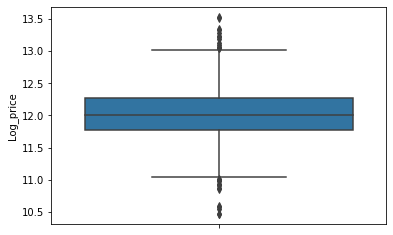

In [144]:
sns.boxplot(y=df['Log_price'])

We do not remove any outliers here because they might be important as a business point of view and affect the selling price.

In [145]:
cols=list(df.columns)
cat_col=cols.copy()
for col in cont_col:
    cat_col.remove(col)
cat_col.remove('Log_price')
print(len(cat_col))

55


In [146]:
df[cat_col].dtypes

MSSubClass         int64
MSZoning          object
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64


## Deriving years of construction/remodelling at the year sold.

In [147]:
df['House_Age']=df['YrSold']-df['YearRemodAdd']

## Segmented Univariate Analysis of categorical variables with respect to the selling price

In [148]:
cat_cols=list(df[cat_col].select_dtypes(include=[object]).columns)

In [149]:
len(cat_cols)

38

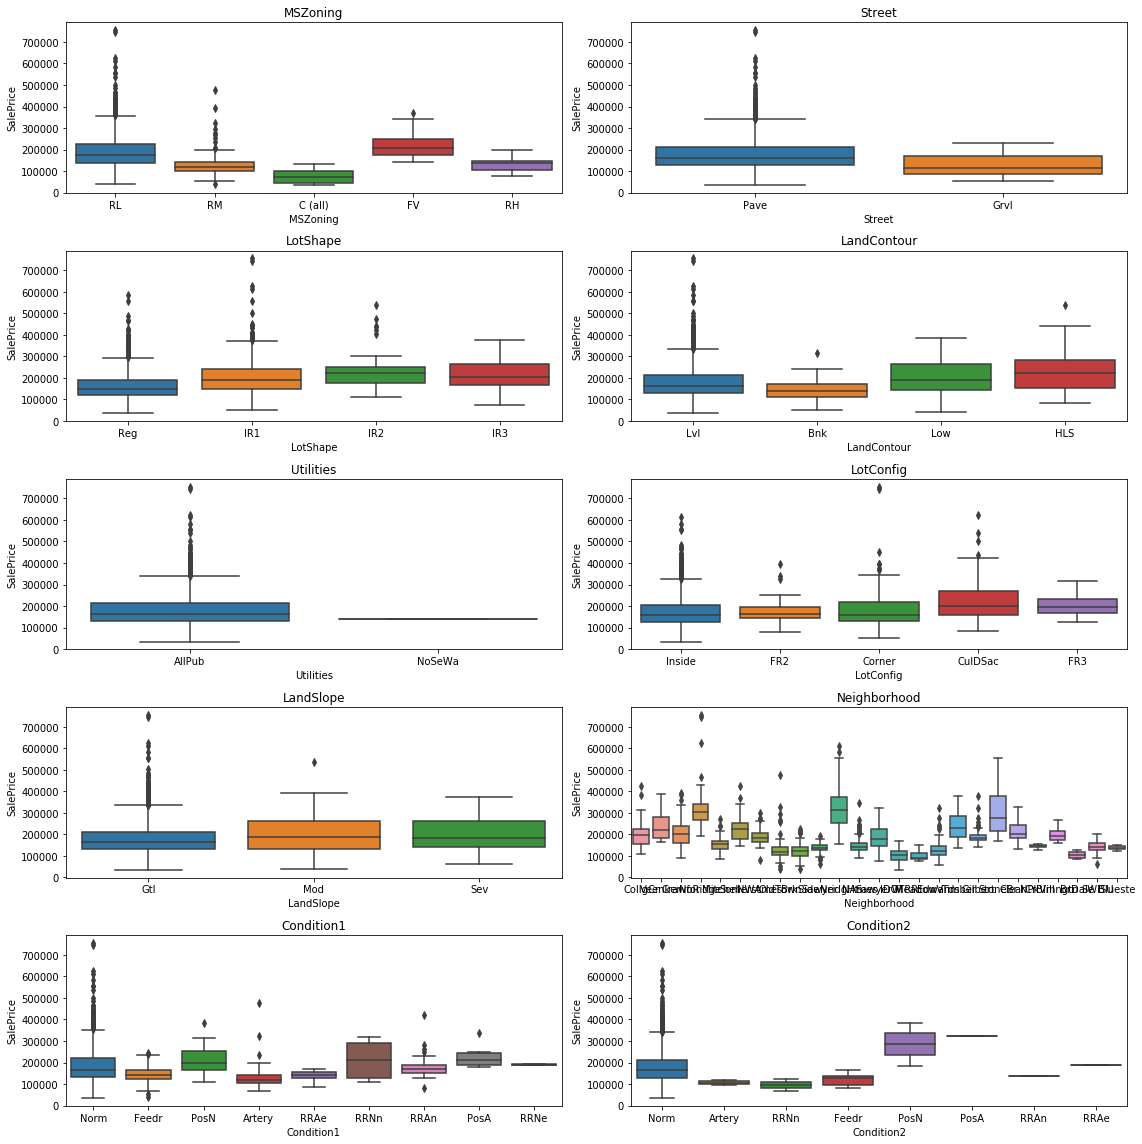

In [150]:
i=1
plt.figure(figsize=(16,16))
for j in range(10):
    plt.subplot(5,2,i)
    sns.boxplot(x=df[cat_cols[j]],y=df['SalePrice'])
    plt.title(cat_cols[j])
    i+=1
    
plt.tight_layout()
plt.show()

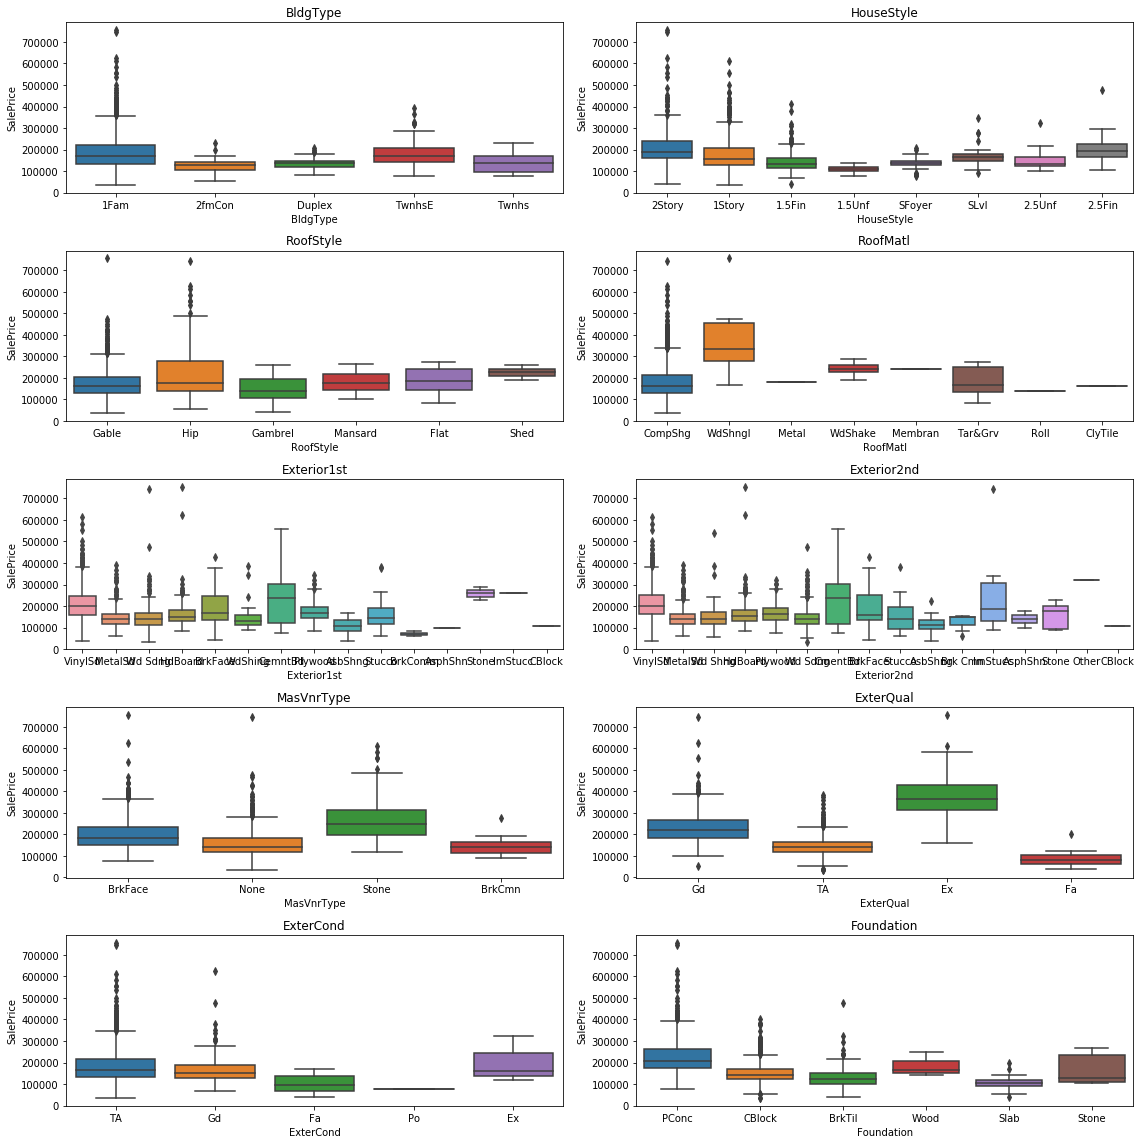

In [151]:
i=1
plt.figure(figsize=(16,16))
for j in range(10,20):
    plt.subplot(5,2,i)
    sns.boxplot(x=df[cat_cols[j]],y=df['SalePrice'])
    plt.title(cat_cols[j])
    i+=1
    
plt.tight_layout()
plt.show()

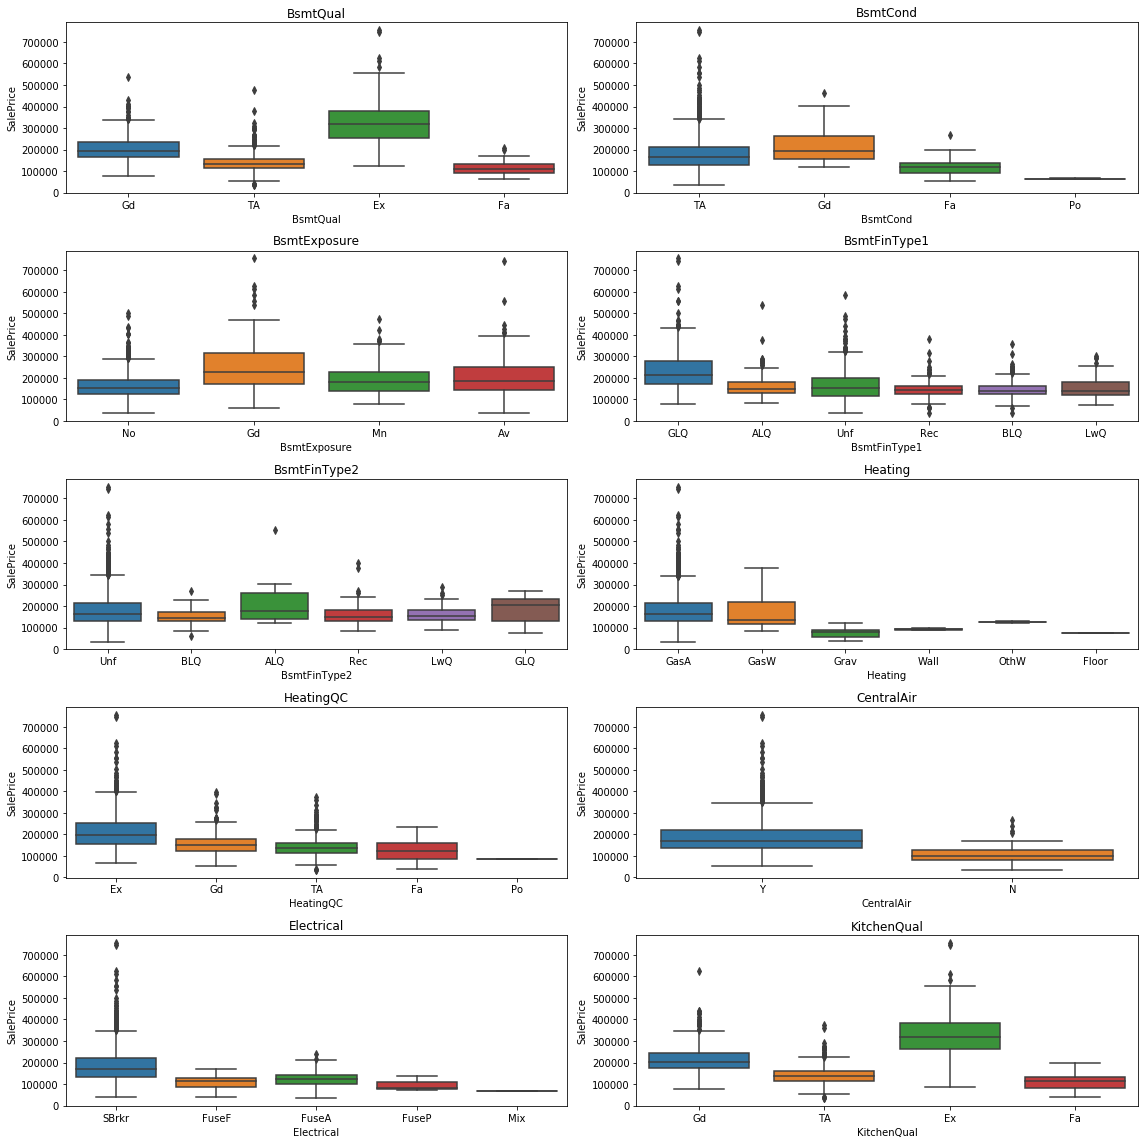

In [152]:
i=1
plt.figure(figsize=(16,16))
for j in range(20,30):
    plt.subplot(5,2,i)
    sns.boxplot(x=df[cat_cols[j]],y=df['SalePrice'])
    plt.title(cat_cols[j])
    i+=1
    
plt.tight_layout()
plt.show()

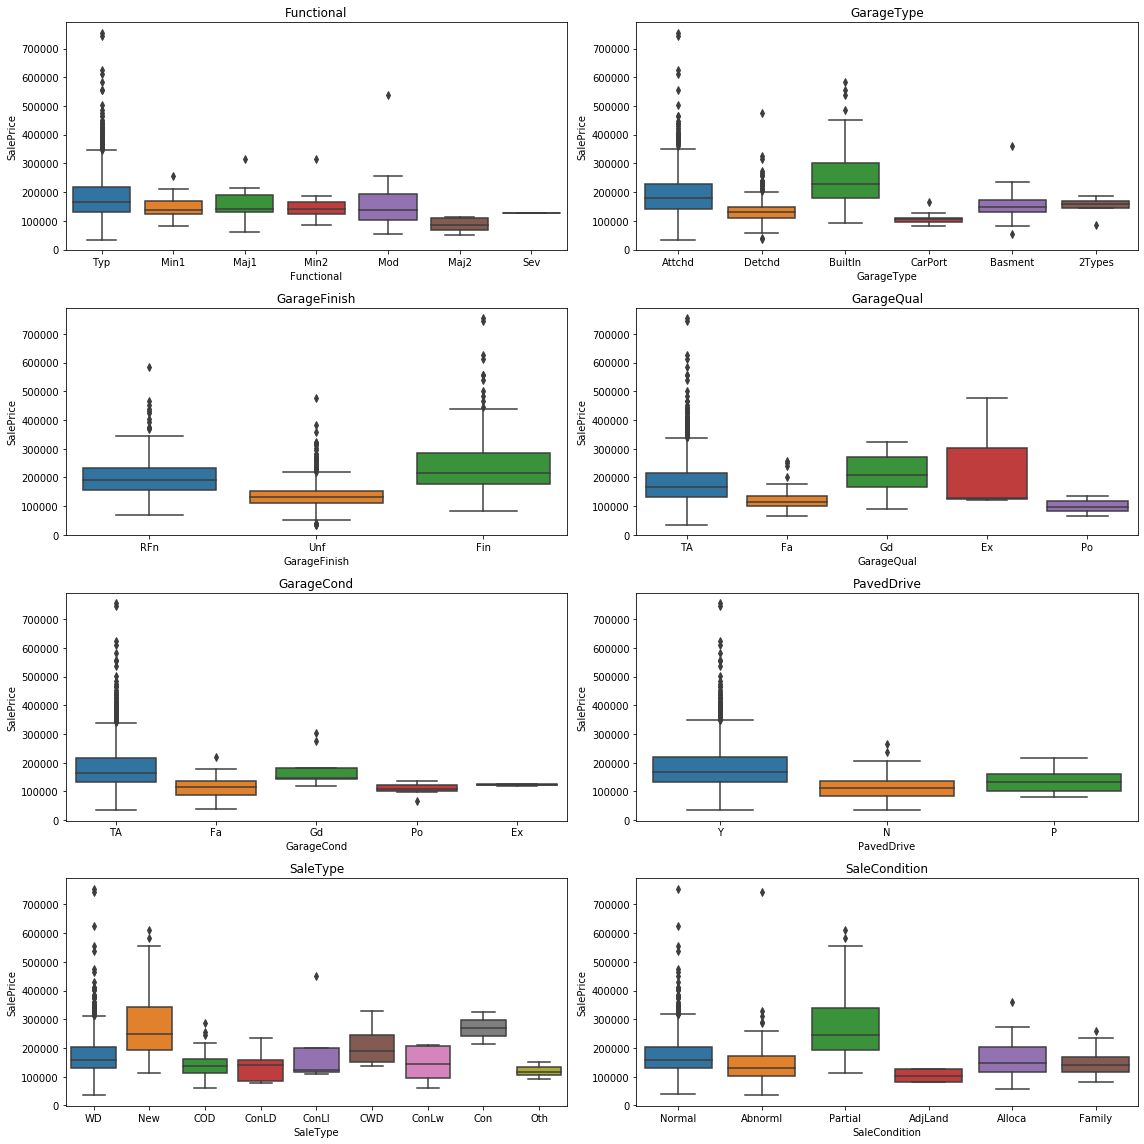

In [30]:
i=1
plt.figure(figsize=(16,16))
for j in range(30,38):
    plt.subplot(4,2,i)
    sns.boxplot(x=df[cat_cols[j]],y=df['SalePrice'])
    plt.title(cat_cols[j])
    i+=1
    
plt.tight_layout()
plt.show()

Hence, we observe that these categorical variables affect the selling price of the house.

## Segmented Univariate Analysis of the ordinal variables

In [153]:
ov=list(df[cat_col].select_dtypes(include=np.int64).columns)

In [154]:
ov

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [155]:
ov.remove('YearBuilt')
ov.remove('YearRemodAdd')
ov.remove('YrSold')

In [156]:
len(ov)

13

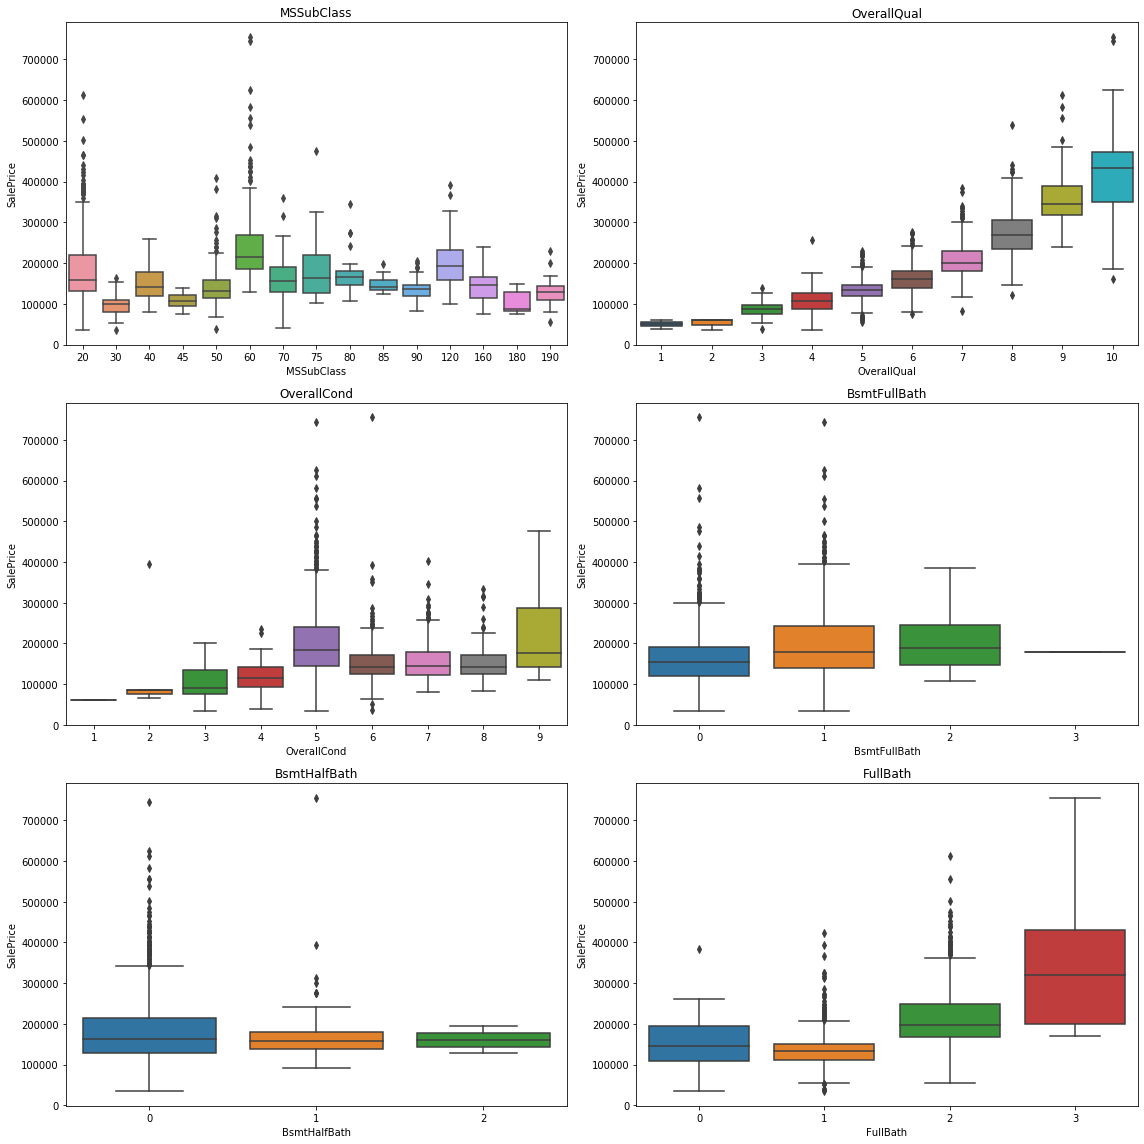

In [157]:
plt.figure(figsize=(16,16))
i=1
for j in range(6):
    plt.subplot(3,2,i)
    sns.boxplot(x=ov[j],y='SalePrice',data=df)
    plt.title(ov[j])
    i+=1
    
plt.tight_layout()
plt.show()

We observe that MSSubClass which is actually a categorical variable appears under thee ordinal variable category since its data type is int. Hence, we will change the data type of MSSubClass to object later on.

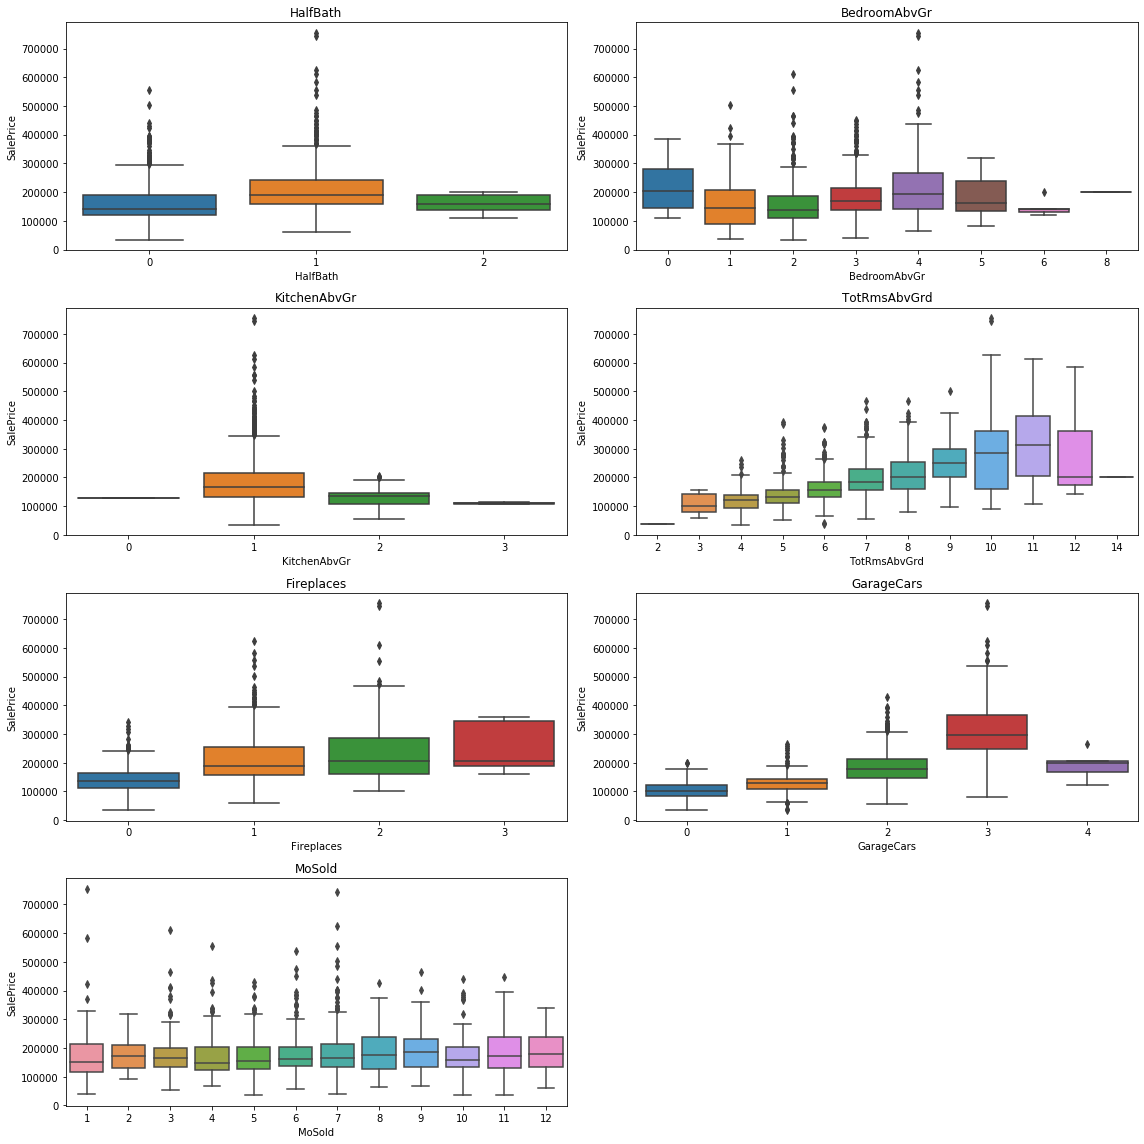

In [158]:
plt.figure(figsize=(16,16))
i=1
for j in range(6,13):
    plt.subplot(4,2,i)
    sns.boxplot(x=ov[j],y='SalePrice',data=df)
    plt.title(ov[j])
    i+=1
    
plt.tight_layout()
plt.show()

Hence, we observe that these ordinal variables also affect the selling price of the house.

## Bivariate Analysis of continuous variables with the selling price.

In [159]:
cont_col

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [160]:
cont_col.remove('SalePrice')

In [161]:
len(cont_col)

18

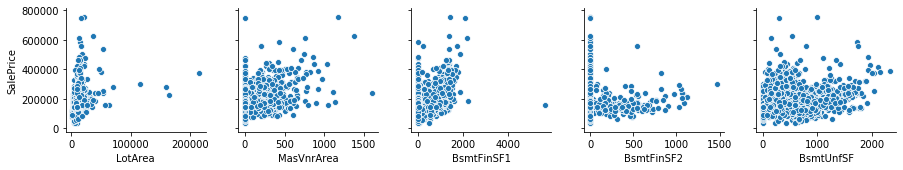

In [162]:
sns.pairplot(x_vars=cont_col[0:5],y_vars='SalePrice',data=df)

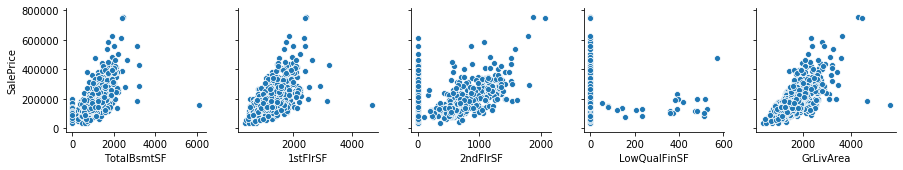

In [163]:
sns.pairplot(x_vars=cont_col[5:10],y_vars='SalePrice',data=df)

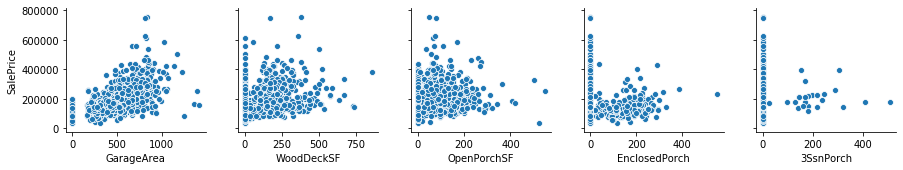

In [164]:
sns.pairplot(x_vars=cont_col[10:15],y_vars='SalePrice',data=df)

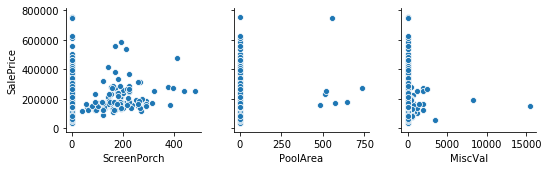

In [165]:
sns.pairplot(x_vars=cont_col[15:18],y_vars='SalePrice',data=df)

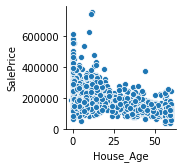

In [166]:
sns.pairplot(x_vars='House_Age',y_vars='SalePrice',data=df)

Thus, we observe that some of these continuous variables are linearly related to the selling price.

In [167]:
num_col=list(df.select_dtypes(include=[np.int64,np.float64]))

In [168]:
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Log_price',
 'House_Age']

Here MSSubClass is a categorical variable, so we change the data type to object. Similarly, we remove 'MoSold','YrSold','YearBuilt','YearRemodAdd' since we have derived the House_Age at the time of sale using these features.

In [169]:
df['MSSubClass']=df['MSSubClass'].astype('category')

In [170]:
num_col=list(df.select_dtypes(include=[np.int64,np.float64]))
num_col.remove('MoSold')
num_col.remove('YrSold')
num_col.remove('YearBuilt')
num_col.remove('YearRemodAdd')
num_col

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Log_price',
 'House_Age']

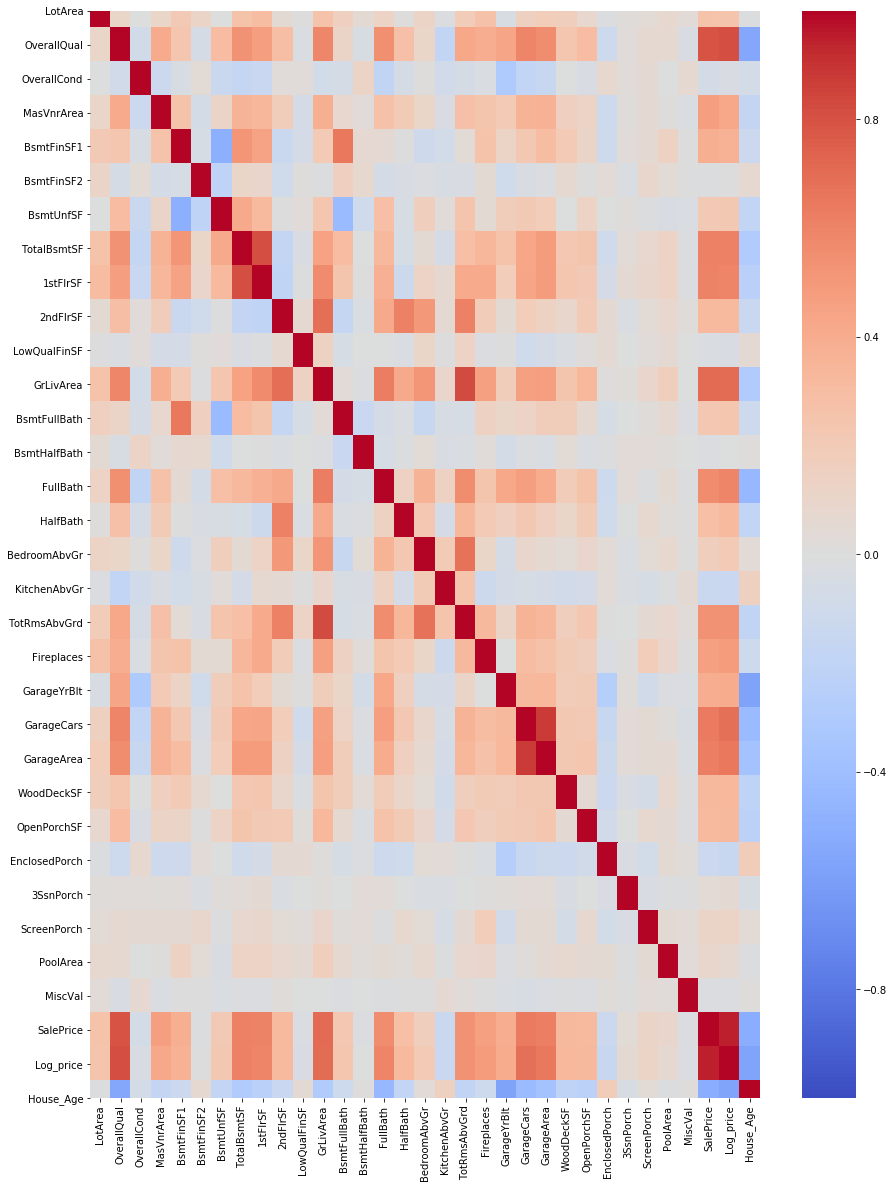

In [171]:
cor=df[num_col].corr()
plt.figure(figsize=(15,20))
sns.heatmap(cor,cmap="coolwarm",vmin=-1,vmax=1)

Hence, from the above heatmap, we observe that there are many numerical variables highly correlated to the SalePrice. We can also observe a significant level of multi-collinearity among these variables.

In [172]:
num_col.remove('Log_price') #we use this list to scale the continuous variables later on
num_col.remove('SalePrice')

In [173]:
cat_col=list(df.select_dtypes(include=[object]).columns)
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [174]:
cat_col.append('MSSubClass') #adding MSSubClass to the list of categorical columns

In [175]:
cols=list(df.columns)
cols.remove('MoSold')
cols.remove('YrSold')
cols.remove('YearBuilt')
cols.remove('YearRemodAdd')
cols.remove('SalePrice')

# 4. Data Preparation

In [176]:
df_model=df[cols]

### Converting the categorical variables to dummy variables

In [177]:
for col in cat_col:
    dv=pd.get_dummies(df_model[col],drop_first=True,prefix=col) #creating dummy variables
    df_model=pd.concat([df_model,dv],axis=1) #concatenating to model dataframe
    
#dropping the original categorical columns
df_model=df_model.drop(cat_col,axis=1)
df_model.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,196.0,706,0,150,856,856,854,...,1,0,0,0,0,0,0,0,0,0
2,9600,6,8,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,0
3,11250,7,5,162.0,486,0,434,920,920,866,...,1,0,0,0,0,0,0,0,0,0
4,9550,7,5,0.0,216,0,540,756,961,756,...,0,1,0,0,0,0,0,0,0,0
5,14260,8,5,350.0,655,0,490,1145,1145,1053,...,1,0,0,0,0,0,0,0,0,0


Thus, we observe that the categorical columns have been converted to dummy variables (one hot encoded).

### Splitting the dataframe into training and test sets

In [178]:
y=df_model.pop('Log_price')
X=df_model

In [179]:
#splitting into traning and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Scaling the numerical variables

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
#scaling the training sets
scaler=StandardScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])

C:\Users\surab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\surab\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [182]:
#scaling the test set
X_test[num_col]=scaler.transform(X_test[num_col])

C:\Users\surab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\surab\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 5. Model Building

In [183]:
#importing important libraries for Model Building
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge Regression

In [184]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [185]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009176,0.001466,0.001595,0.000488,0.0001,{'alpha': 0.0001},-0.090099,-0.096340,-0.094488,-0.098820,...,-0.092613,0.005446,14,-0.054619,-0.055714,-0.055936,-0.056886,-0.056056,-0.055842,0.000729
1,0.010786,0.001599,0.002123,0.000469,0.001,{'alpha': 0.001},-0.089810,-0.096337,-0.094416,-0.098331,...,-0.092440,0.005362,12,-0.054670,-0.055720,-0.055989,-0.056951,-0.056124,-0.055891,0.000736
2,0.010474,0.002046,0.001964,0.000689,0.01,{'alpha': 0.01},-0.089427,-0.096299,-0.094186,-0.094594,...,-0.091673,0.004518,9,-0.055597,-0.055775,-0.056769,-0.057743,-0.057101,-0.056597,0.000809
3,0.013278,0.003620,0.002988,0.000899,0.05,{'alpha': 0.05},-0.091022,-0.096128,-0.097129,-0.089637,...,-0.092523,0.003444,13,-0.059363,-0.056045,-0.059875,-0.061222,-0.060976,-0.059496,0.001857
4,0.012966,0.000630,0.002593,0.000489,0.1,{'alpha': 0.1},-0.092730,-0.096058,-0.098719,-0.088476,...,-0.093411,0.003617,17,-0.061709,-0.056382,-0.062022,-0.063880,-0.063584,-0.061515,0.002702


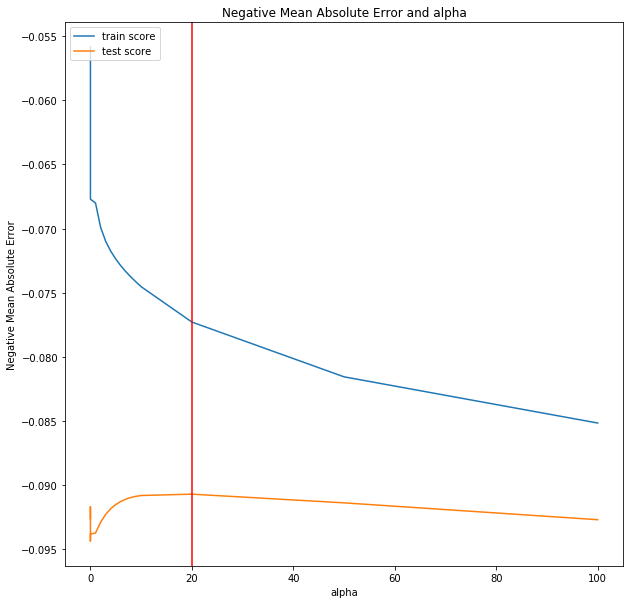

In [186]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.axvline(x=20,color='r')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [187]:
model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [188]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01496149,  0.08475706,  0.03427686,  0.00221037,  0.00037154,
        0.00584421,  0.00678692,  0.00918304,  0.03212487,  0.03585557,
        0.00048241,  0.05341397,  0.02817362,  0.00313619,  0.02606124,
        0.01882465,  0.0106481 , -0.02024181,  0.01769897,  0.02175346,
       -0.00229498,  0.04314333,  0.00785799,  0.01275829, -0.00265637,
        0.00506852,  0.00730349,  0.01031587, -0.01740254, -0.00128003,
       -0.02778052,  0.04027655,  0.02213968,  0.04791725, -0.01088932,
        0.01986109,  0.0187556 , -0.03311775, -0.00218742,  0.0250033 ,
        0.02829833,  0.03372305, -0.00634657,  0.03430526, -0.02556998,
       -0.00581775, -0.00652655,  0.02158176, -0.00216016, -0.00152416,
       -0.01515357,  0.02043126,  0.04012626, -0.00901655,  0.06371246,
       -0.06998672, -0.01441077, -0.05063814, -0.03275683, -0.01648041,
       -0.01373711, -0.01097752, -0.00619415,  0.04212521,  0.06418722,
       -0.02821574, -0.00134088, -0.02085217, -0.00220401,  0.06

In [189]:
rc=pd.DataFrame({'Column Name':X_train.columns,'Ridge Coefficient':ridge.coef_})
rc=rc.sort_values(by='Ridge Coefficient',ascending=False)
rc.head()

,Column Name,Ridge Coefficient
1,OverallQual,0.084757
64,Neighborhood_NridgHt,0.064187
54,Neighborhood_Crawfor,0.063712
69,Neighborhood_Somerst,0.060986
11,GrLivArea,0.053414


In [190]:
rc['Absolute value of Coefficient']=abs(rc['Ridge Coefficient'])
rc=rc.sort_values(by='Absolute value of Coefficient',ascending=False)

In [191]:
rc.head()

,Column Name,Ridge Coefficient,Absolute value of Coefficient
1,OverallQual,0.084757,0.084757
55,Neighborhood_Edwards,-0.069987,0.069987
227,MSSubClass_30,-0.068057,0.068057
64,Neighborhood_NridgHt,0.064187,0.064187
54,Neighborhood_Crawfor,0.063712,0.063712


In [192]:
from sklearn.metrics import r2_score

In [193]:
y_train_ridge_pred=ridge.predict(X_train)
r2_score(y_train,y_train_ridge_pred)

0.914774950433277

In [194]:
y_test_ridge_pred=ridge.predict(X_test)
r2_score(y_test,y_test_ridge_pred)

0.8856305635878529

We have the following observations:

- **Optimal Value of Alpha:** The optimal value of alpha for ridge regression is 20.
- **Five most important predictor variables:** The five most important predictor variables are ***OverallQual, Neighborhood_Edwards, MSSubClass_30, Neighborhood_NridgHt*** and ***Neighborhood_Crawfor***. Here, **Neighborhood_Edwards** and **MSSubClass_30** are negatively related to the selling price while the rest are positively related to the selling price.
- **r2_score on Test Set:** The r squared value for test set is 88.56% while for training set is 91.48%. Thus we observe that there is no overfitting in the model building process.

*Now, we double the value of optimal alpha and check the results.*

In [195]:
alpha = 40
ridged = Ridge(alpha=alpha)

ridged.fit(X_train, y_train)
ridged.coef_

array([ 1.48758651e-02,  8.72675729e-02,  3.52406130e-02,  4.05545643e-03,
        3.16568463e-03,  5.58205205e-03,  6.89700334e-03,  1.20224918e-02,
        3.23569417e-02,  3.03295652e-02,  1.00307659e-04,  4.90315560e-02,
        2.79055004e-02,  3.08196213e-03,  2.68527746e-02,  1.93614772e-02,
        1.10125046e-02, -2.00031073e-02,  1.99411324e-02,  2.41261061e-02,
       -1.79246457e-03,  4.19125863e-02,  1.24253935e-02,  1.28724017e-02,
       -2.83800956e-03,  3.95205286e-03,  7.17610941e-03,  1.03764051e-02,
       -1.83613218e-02, -1.63452223e-03, -2.87904606e-02,  2.94477626e-02,
        1.09078214e-02,  3.75948558e-02, -2.35406562e-02,  1.26100387e-02,
        1.37406847e-02, -2.25827715e-02, -4.49006660e-03,  1.53590147e-02,
        1.91632590e-02,  2.19227607e-02, -3.57539562e-03,  2.80064422e-02,
       -1.64033337e-02, -3.02568124e-03, -5.40056269e-03,  1.65415783e-02,
       -8.22124498e-04, -9.88041945e-04, -1.11481309e-02,  1.56625053e-02,
        2.81026891e-02, -

In [196]:
rcd=pd.DataFrame({'Column Name':X_train.columns,'Ridge Coefficient':ridged.coef_})
rcd=rcd.sort_values(by='Ridge Coefficient',ascending=False)
rcd['Absolute value of Coefficient']=abs(rcd['Ridge Coefficient'])
rcd=rcd.sort_values(by='Absolute value of Coefficient',ascending=False)
rcd.head()

,Column Name,Ridge Coefficient,Absolute value of Coefficient
1,OverallQual,0.087268,0.087268
55,Neighborhood_Edwards,-0.055211,0.055211
227,MSSubClass_30,-0.052565,0.052565
11,GrLivArea,0.049032,0.049032
54,Neighborhood_Crawfor,0.046832,0.046832


We now observe that ***GrLivArea*** replaces the ***Neighborhood_NridgHt*** variable and the coefficients of other variables also change little bit.

In [197]:
y_train_ridged_pred=ridged.predict(X_train)
r2_score(y_train,y_train_ridged_pred)

0.9070982389826727

In [198]:
y_test_ridged_pred=ridged.predict(X_test)
r2_score(y_test,y_test_ridged_pred)

0.8830648482349067

We observe that the r2_score for both training and test set decreases marginally when we double the value of alpha.

#### Ridge Regression Model Evaluation on Training Set

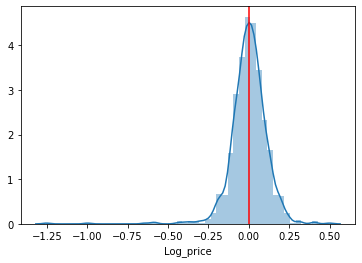

In [199]:
res_ridge=y_train-y_train_ridge_pred
sns.distplot(res_ridge)
plt.axvline(x=0,color='r')

Thus, we observe that the error terms are normally distributed and centred around the mean=0.

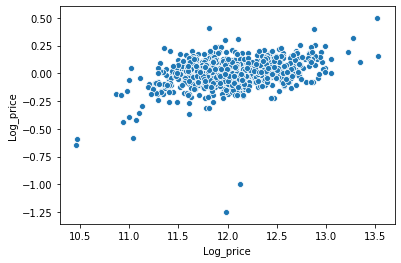

In [200]:
sns.scatterplot(y_train,res_ridge)

The error terms are independent of each other.

Text(0, 0.5, 'Price')

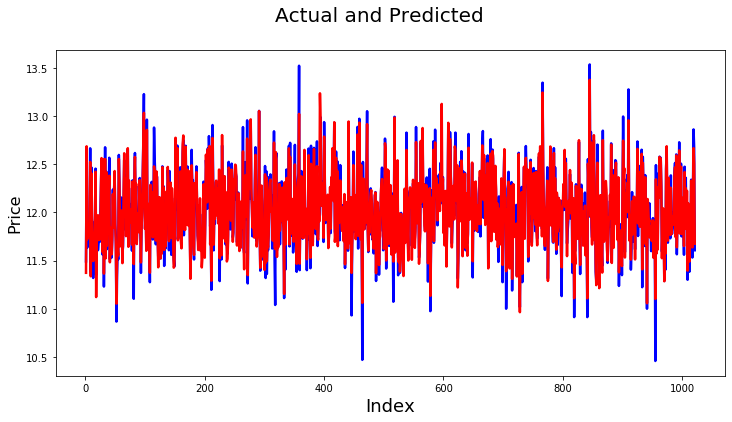

In [201]:
#prediction plot
#Actual vs Predicted
c = [i for i in range(1,1022,1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_ridge_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

#### Ridge Regression Model Evaluation on Test Set

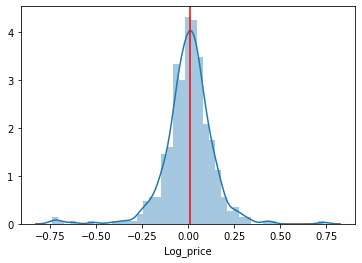

In [202]:
res_ridge=y_test-y_test_ridge_pred
sns.distplot(res_ridge)
plt.axvline(x=0.01,color='r')

Thus, we observe that the error terms are normally distributed around the mean=0.

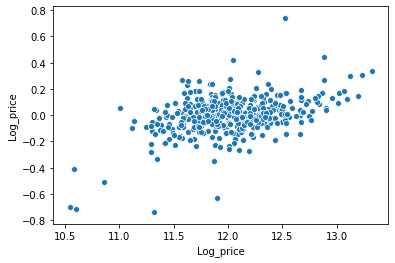

In [203]:
sns.scatterplot(y_test,res_ridge)

Thus, we observe that the error terms are independent of each other.

Text(0, 0.5, 'Price')

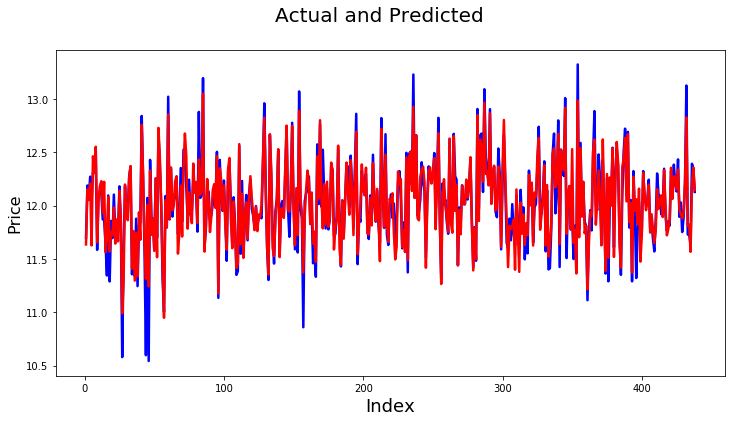

In [204]:
#prediction plot
#Actual vs Predicted
c = [i for i in range(1,439,1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_ridge_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

In [205]:
statr=pd.DataFrame()

In [206]:
statr.loc['Ridge','Training_r2']=r2_score(y_train,y_train_ridge_pred)
statr.loc['Double Ridge','Training_r2']=r2_score(y_train,y_train_ridged_pred)
statr.loc['Ridge','Test_r2']=r2_score(y_test,y_test_ridge_pred)
statr.loc['Double Ridge','Test_r2']=r2_score(y_test,y_test_ridged_pred)
statr

,Training_r2,Test_r2
Ridge,0.914775,0.885631
Double Ridge,0.907098,0.883065


### Lasso Regression

In [207]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [208]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083348,0.014307,0.003007,0.000616,0.0001,{'alpha': 0.0001},-0.086428,-0.092894,-0.093599,-0.086179,...,-0.088012,0.004701,1,-0.063298,-0.059328,-0.063576,-0.063301,-0.065442,-0.062989,0.001998
1,0.044082,0.003420,0.002607,0.000473,0.001,{'alpha': 0.001},-0.087280,-0.098836,-0.098781,-0.081203,...,-0.091016,0.006864,2,-0.081644,-0.072862,-0.077371,-0.082511,-0.082404,-0.079358,0.003757
2,0.015153,0.001620,0.001988,0.000013,0.01,{'alpha': 0.01},-0.099322,-0.116231,-0.110114,-0.097799,...,-0.105629,0.006847,3,-0.104183,-0.093462,-0.099507,-0.104507,-0.104406,-0.101213,0.004309
3,0.014957,0.002007,0.002578,0.000466,0.05,{'alpha': 0.05},-0.124153,-0.136599,-0.132121,-0.131237,...,-0.131683,0.004208,4,-0.133805,-0.119112,-0.128903,-0.132568,-0.134344,-0.129746,0.005646
4,0.019443,0.002157,0.002786,0.000753,0.1,{'alpha': 0.1},-0.160039,-0.172897,-0.163511,-0.161582,...,-0.164620,0.004476,5,-0.165446,-0.157616,-0.162315,-0.163547,-0.167809,-0.163347,0.003413


In [209]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

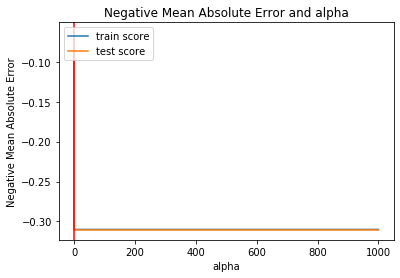

In [210]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.axvline(x=0.0001,color='r')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [211]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [212]:
lasso.coef_

array([ 1.72043398e-02,  6.58966280e-02,  3.05056837e-02,  1.74547349e-03,
        4.34961938e-03,  2.84601222e-03, -0.00000000e+00,  2.51965476e-02,
        6.79984101e-02,  7.66045123e-02,  5.16443076e-03,  3.14118197e-02,
        2.05814288e-02,  1.58823099e-03,  1.77556118e-02,  1.22602445e-02,
        6.58555554e-03, -1.85302427e-02,  4.71943874e-03,  1.49314712e-02,
       -3.54776626e-04,  3.71668949e-02,  5.03348564e-03,  9.59629209e-03,
        4.30208946e-03,  4.18082179e-03,  6.57531787e-03,  8.14440650e-03,
       -1.02533898e-02, -1.31917290e-03, -2.80253306e-02,  3.53625668e-01,
        3.58050262e-01,  3.56618208e-01,  3.06527672e-01,  1.94352524e-02,
        6.45209539e-03, -5.84330908e-02,  3.02312749e-03,  3.08237572e-02,
        3.78666849e-02,  3.70159735e-02, -8.23361498e-03,  3.96745636e-02,
       -4.07524181e-02, -0.00000000e+00, -6.52880128e-03,  1.36619826e-02,
       -1.48627263e-03,  0.00000000e+00, -8.42925358e-03,  3.46646973e-02,
        7.79901779e-02,  

In [213]:
lc=pd.DataFrame({"Column Name":X_train.columns,"Lasso Coefficient":lasso.coef_})
lc=lc.sort_values(by='Lasso Coefficient',ascending=False)
lc.head()

,Column Name,Lasso Coefficient
110,RoofMatl_WdShngl,1.058865
104,RoofMatl_CompShg,0.988878
107,RoofMatl_Roll,0.939286
109,RoofMatl_WdShake,0.924310
108,RoofMatl_Tar&Grv,0.915490


In [214]:
lc['Absolute value of Coefficient']=abs(lc['Lasso Coefficient'])
lc=lc.sort_values(by='Absolute value of Coefficient',ascending=False)
lc.head()

,Column Name,Lasso Coefficient,Absolute value of Coefficient
84,Condition2_PosN,-1.249260,1.249260
110,RoofMatl_WdShngl,1.058865,1.058865
104,RoofMatl_CompShg,0.988878,0.988878
107,RoofMatl_Roll,0.939286,0.939286
109,RoofMatl_WdShake,0.924310,0.924310


In [215]:
y_train_lasso_pred=lasso.predict(X_train)
y_test_lasso_pred=lasso.predict(X_test)

In [216]:
r2_score(y_train,y_train_lasso_pred)

0.9468611448587144

In [217]:
r2_score(y_test,y_test_lasso_pred)

0.8766034599073657

Thus, we observe the following:
- **Optimal Value of alpha:** The optimal value of alpha for Lasso Regression is 0.0001.
- **Five Most Important Variables:** The five most important variables are ***Condition2_PosN, RoofMatl_WdShngl, RoofMatl_CompShg, RoofMatl_Roll*** and ***RoofMatl_WdShake***. Condition2_PosN is negatively corelated while the rest of the variables are positively correlated with the Selling Price.
- **r2_score:** The R Squared value for training set is 94.69% and for test set is 87.67%.

*Now, we double the value of optimal alpha and check the results.*

In [218]:
alpha =0.0002

lassod = Lasso(alpha=alpha)
        
lassod.fit(X_train, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [219]:
lcd=pd.DataFrame({"Column Name":X_train.columns,"Lasso Coefficient":lassod.coef_})
lcd=lcd.sort_values(by='Lasso Coefficient',ascending=False)
lcd['Absolute value of Coefficient']=abs(lcd['Lasso Coefficient'])
lcd=lcd.sort_values(by='Absolute value of Coefficient',ascending=False)
lcd.head()

,Column Name,Lasso Coefficient,Absolute value of Coefficient
84,Condition2_PosN,-1.008959,1.008959
33,MSZoning_RL,0.269341,0.269341
32,MSZoning_RH,0.263422,0.263422
31,MSZoning_FV,0.255769,0.255769
34,MSZoning_RM,0.222066,0.222066


In [220]:
y_train_lassod_pred=lassod.predict(X_train)
y_test_lassod_pred=lassod.predict(X_test)

In [221]:
r2_score(y_train,y_train_lassod_pred)

0.9337040863426835

In [222]:
r2_score(y_test,y_test_lassod_pred)

0.8758833055822481

Hence, we observe that R Squared value decreases marginally for both training and test sets when we double the value of alpha.
<br>
Moreover, the five most important variables have changed to ***Condition2_PosN, MSZoning_RL,MSZoning_RH, MSZoning_FV*** and ***MSZoning_RM***.

#### Lasso Regression Model Evaluation on Training Set

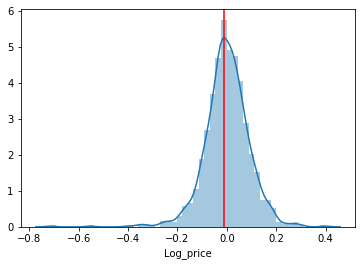

In [223]:
res_lasso=y_train-y_train_lasso_pred
sns.distplot(res_lasso)
plt.axvline(x=-0.01,color='r')

Hence, we observe that the error terms are normally distributed and centred around 0.

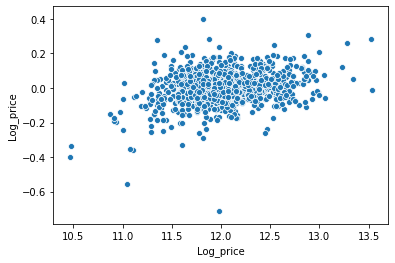

In [224]:
sns.scatterplot(y_train,res_lasso)

The error terms are independent of each other.

Text(0, 0.5, 'Price')

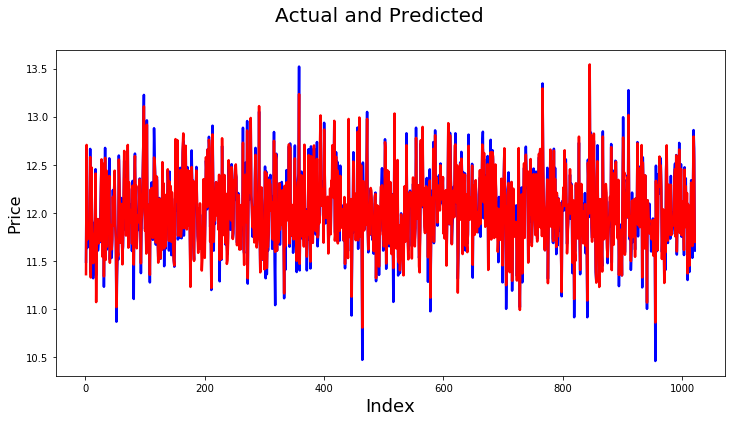

In [225]:
#prediction plot
#Actual vs Predicted
c = [i for i in range(1,1022,1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_lasso_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

#### Lasso Regression Model Evaluation on Test Set

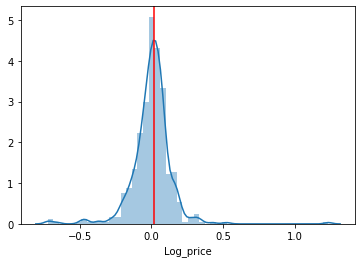

In [226]:
res_lasso=y_test-y_test_lasso_pred
sns.distplot(res_lasso)
plt.axvline(x=0.02,color='r')

Thus, we observe that the error terms are normally distributed and are centred around mean=0.

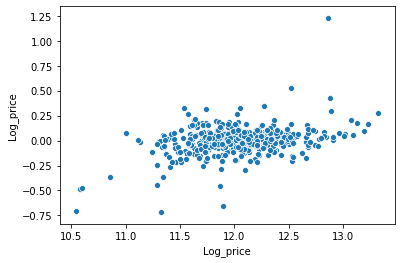

In [227]:
sns.scatterplot(y_test,res_lasso)

The error terms are independent of each other.

Text(0, 0.5, 'Price')

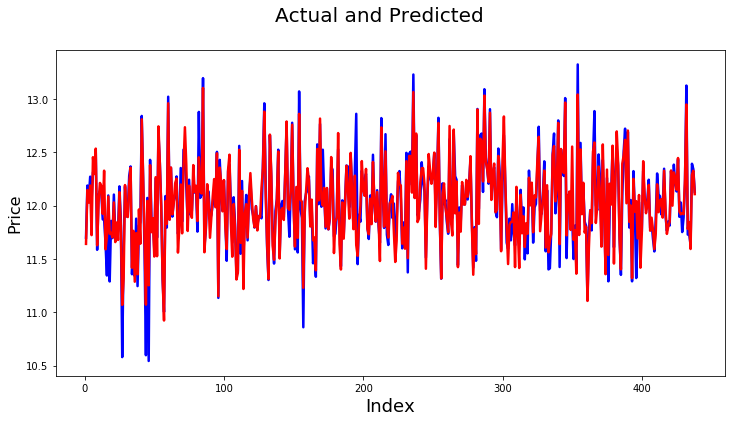

In [228]:
#prediction plot
#Actual vs Predicted
c = [i for i in range(1,439,1)]
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_lasso_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

In [229]:
statl=pd.DataFrame()

In [230]:
statl.loc['Lasso','Training_r2']=r2_score(y_train,y_train_lasso_pred)
statl.loc['Double Lasso','Training_r2']=r2_score(y_train,y_train_lassod_pred)
statl.loc['Lasso','Test_r2']=r2_score(y_test,y_test_lasso_pred)
statl.loc['Double Lasso','Test_r2']=r2_score(y_test,y_test_lassod_pred)
statl

,Training_r2,Test_r2
Lasso,0.946861,0.876603
Double Lasso,0.933704,0.875883


We choose to go with ***Lasso Regression*** since it helps us in feature selection. The coefficients of the variables which are not important is equal to 0 in the case of Lasso Regression.

## Lasso Regression Model excluding the top 5 predictor variables 

In [231]:
cols_to_drop=['Condition2_PosN','MSZoning_RL','MSZoning_RH','MSZoning_FV','MSZoning_RM']
X_train=X_train.drop(cols_to_drop,axis=1)

In [232]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\surab\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07581477961475347, tolerance: 0.01314405480698585
  positive)
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [233]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109914,0.062004,0.002597,0.000810,0.0001,{'alpha': 0.0001},-0.093821,-0.099949,-0.095852,-0.089853,...,-0.094135,0.003570,2,-0.070004,-0.064036,-0.064691,-0.069591,-0.070400,-0.067744,0.002780
1,0.042487,0.006927,0.002428,0.000463,0.001,{'alpha': 0.001},-0.088500,-0.100290,-0.098416,-0.081733,...,-0.091799,0.006796,1,-0.083073,-0.075807,-0.077282,-0.083737,-0.083551,-0.080690,0.003424
2,0.018227,0.002268,0.002799,0.001152,0.01,{'alpha': 0.01},-0.102776,-0.118098,-0.112282,-0.099164,...,-0.107650,0.006770,3,-0.105742,-0.095314,-0.101869,-0.107016,-0.106824,-0.103353,0.004427
3,0.020253,0.002403,0.003382,0.000722,0.05,{'alpha': 0.05},-0.124153,-0.136599,-0.132121,-0.131237,...,-0.131683,0.004208,4,-0.133805,-0.119112,-0.128903,-0.132568,-0.134344,-0.129746,0.005646
4,0.017013,0.001483,0.002734,0.000738,0.1,{'alpha': 0.1},-0.160039,-0.172897,-0.163511,-0.161582,...,-0.164620,0.004476,5,-0.165446,-0.157616,-0.162315,-0.163547,-0.167809,-0.163347,0.003413


In [234]:
model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

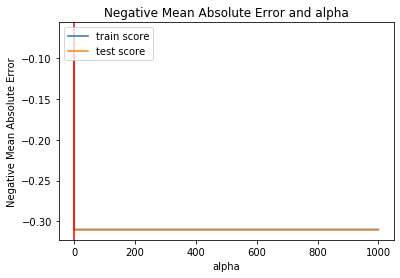

In [235]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.axvline(x=0.001,color='r')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [236]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [237]:
lc_new=pd.DataFrame({'Column Name':X_train.columns,'Lasso Coefficients':lasso.coef_})
lc_new['Absolute Coefficients Value']=abs(lc_new['Lasso Coefficients'])
lc_new=lc_new.sort_values(by='Absolute Coefficients Value',ascending=False)
lc_new.head()

,Column Name,Lasso Coefficients,Absolute Coefficients Value
222,MSSubClass_30,-0.103245,0.103245
60,Neighborhood_NridgHt,0.099171,0.099171
85,BldgType_Twnhs,-0.093744,0.093744
11,GrLivArea,0.093720,0.093720
1,OverallQual,0.092141,0.092141


The five most important variables now are ***MSSubClass_30, Neighborhood_NridgHt, BldgType_Twnhs, GrLivArea*** and ***OverallQual***. 
<br>
<br>
MSSubClass_30 and BldgType_Twnhs are negatively correlated with the selling price while the rest of the variables are positively correlated.